In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import datetime
from ipywidgets import widgets
import numpy as np
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas_profiling import ProfileReport

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#sns.reset_defaults()
sns.set_style("whitegrid")
import matplotlib.dates as mdates

# ipython magic %matplotlib inline - allow to visualize the time series in the notebook

%matplotlib inline

/var/folders/7s/4209w2z92tb9s6hj_4fc60dr0000gn/T/ipykernel_31078/1643768892.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('./datasets/data.csv')
df.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [3]:
# Conversion factor: 1 lakh INR to 1,100 euros (update this based on the current exchange rate)
conversion_factor = 1100

# Create a new column 'price_in_eur'
df['price(in eur)'] = df['price(in lakhs)'] * conversion_factor

In [4]:
df = df.iloc[:, 1:]

In [5]:
df.head()

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),price(in eur)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,70125.0
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,9889.0
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,26125.0
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,14916.0
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,26400.0


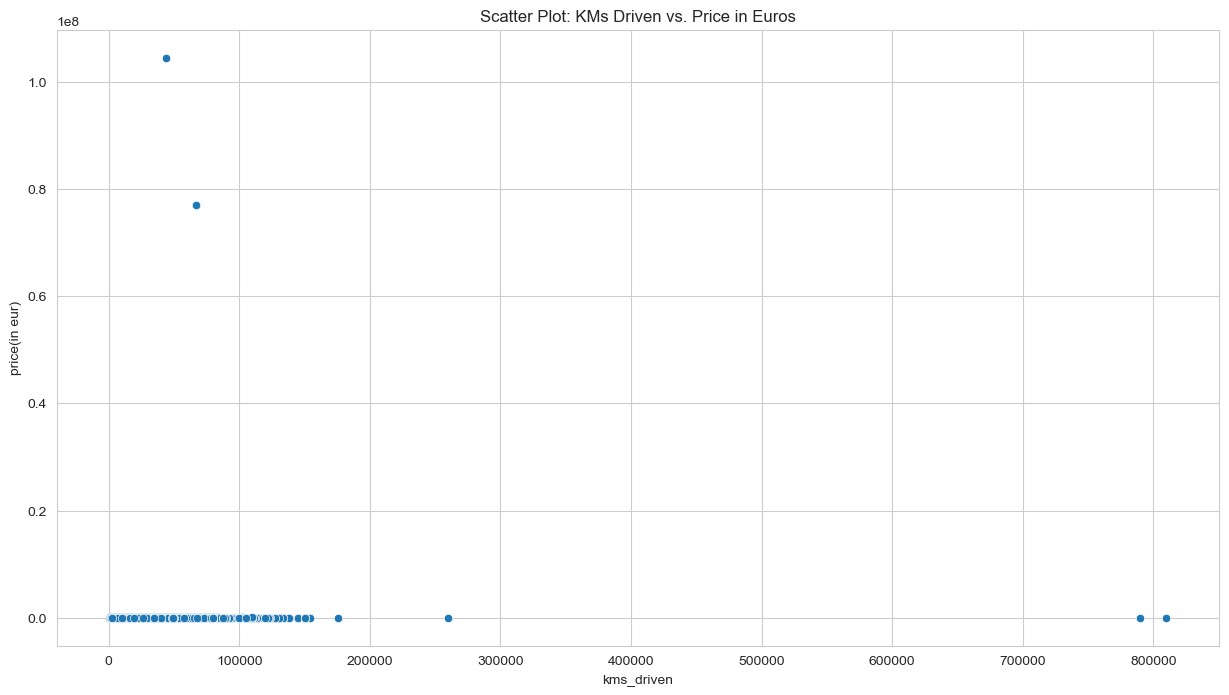

In [6]:
# Scatter plots for numerical variables against the price in euros
plt.figure(figsize=(15, 8))
sns.scatterplot(x='kms_driven', y='price(in eur)', data=df)
plt.title('Scatter Plot: KMs Driven vs. Price in Euros')
plt.show()

In [ ]:
# Get unique values from fuel_type column
unique_values = df['fuel_type'].unique()

# Print or use the unique values as needed
print(unique_values)


In [7]:
# filtering out the rows with incorrect values
wrong_fuel_type = (df['fuel_type'] == '5 Seats')

# Update the 'fuel_type' and 'seats' columns for the rows that meet the condition
df.loc[wrong_fuel_type, 'fuel_type'] = 'Petrol'
df.loc[wrong_fuel_type, 'seats'] = 5

In [8]:
df.isnull().sum()

car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
price(in eur)         0
dtype: int64

In [9]:
df_imputation = df.copy()

In [10]:
df_imputation['mileage(kmpl)'] = df_imputation['mileage(kmpl)'].fillna(method='ffill')
df_imputation['engine(cc)'] = df_imputation['engine(cc)'].fillna(method='ffill')
df_imputation['max_power(bhp)'] = df_imputation['max_power(bhp)'].fillna(method='ffill')
df_imputation['torque(Nm)'] = df_imputation['torque(Nm)'].fillna(method='ffill')

In [11]:
df_imputation.isnull().sum()

car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
price(in eur)         0
dtype: int64

In [12]:
df_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1553 non-null   float64
 10  engine(cc)          1553 non-null   float64
 11  max_power(bhp)      1553 non-null   float64
 12  torque(Nm)          1553 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
 14  price(in eur)       1553 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 182.1+

In [13]:
df_imputation.to_csv('./datasets/clean_data.csv')

In [14]:
print('Num features: ', df_imputation.columns.tolist())

Num features:  ['car_name', 'registration_year', 'insurance_validity', 'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission', 'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)', 'price(in eur)']


# Visualizations

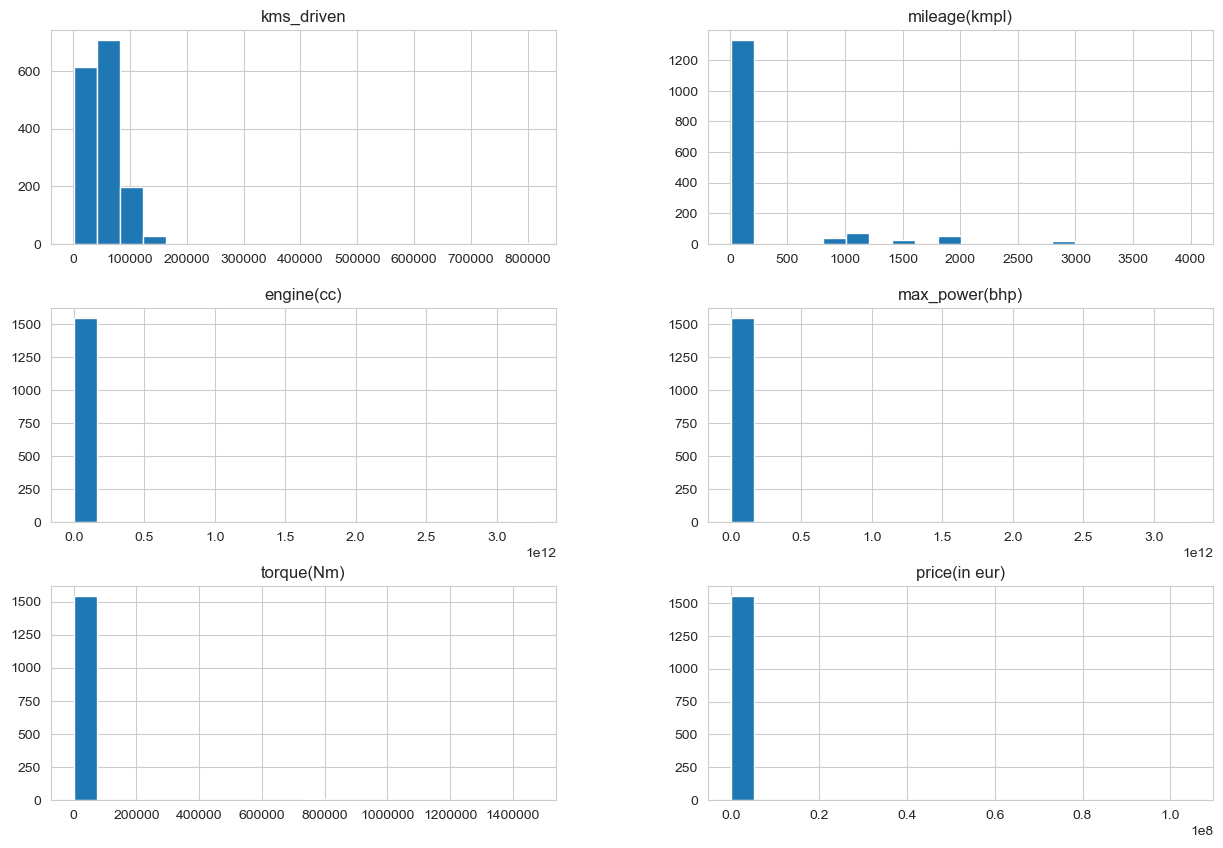

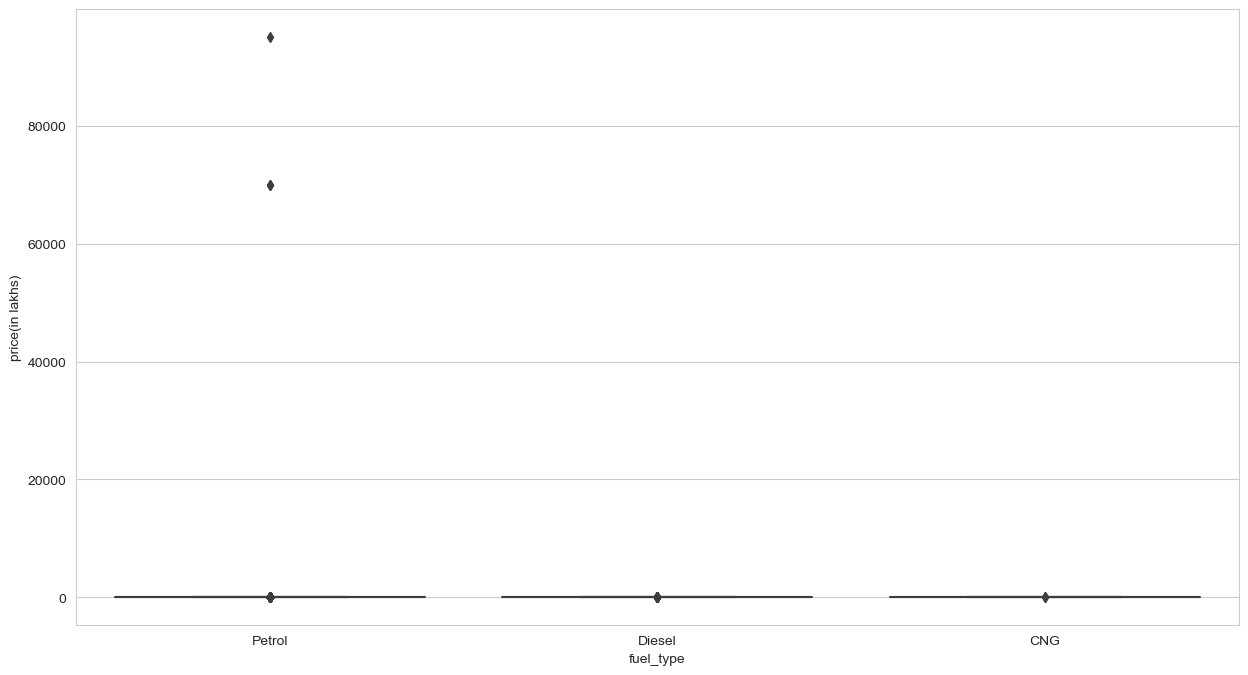

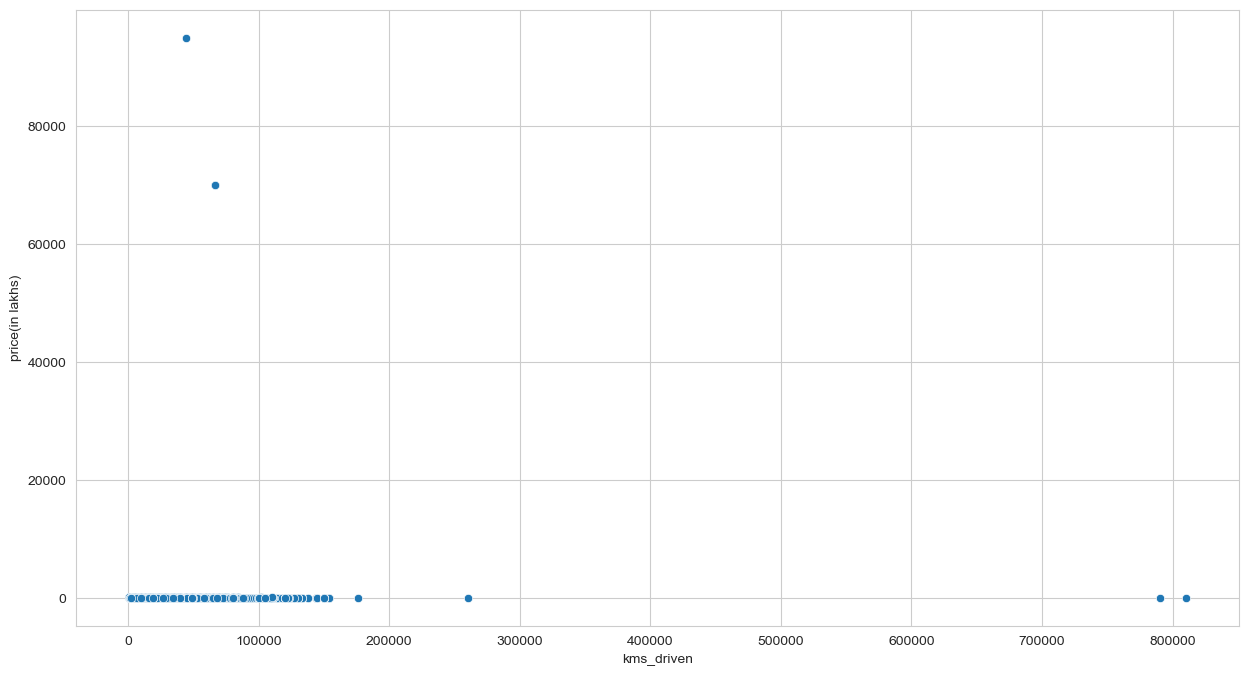

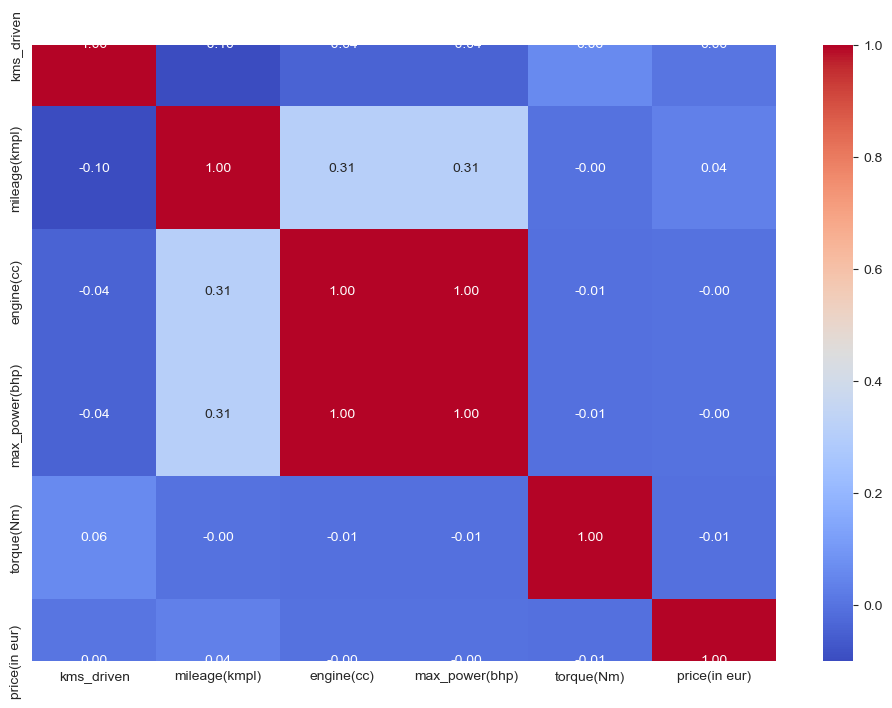

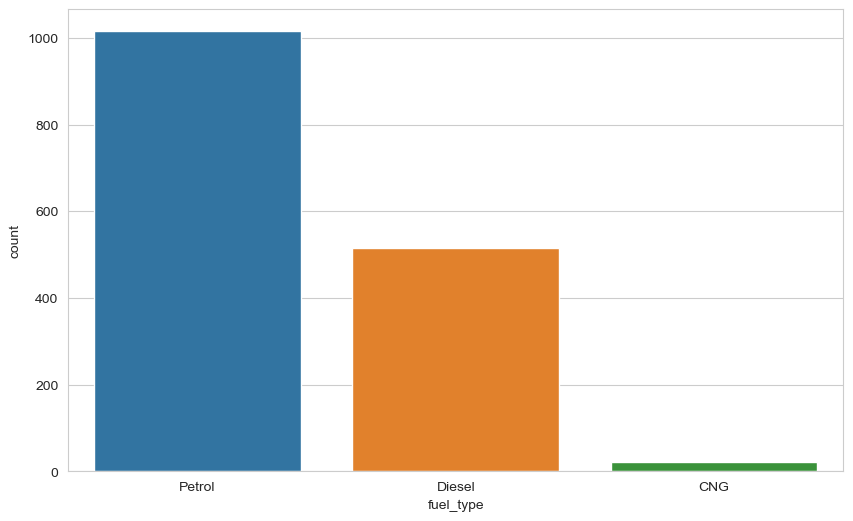

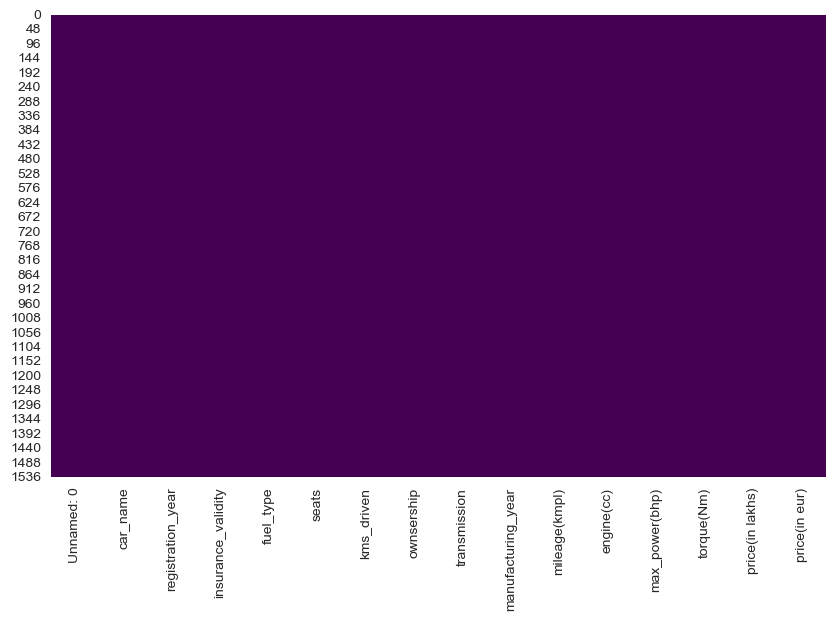

In [15]:
# 1. Histograms and Distributions
numerical_variables = ['kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in eur)']
df = pd.read_csv('./datasets/clean_data.csv')
df[numerical_variables].hist(bins=20, figsize=(15, 10))
plt.show()

# 2. Box Plots
plt.figure(figsize=(15, 8))
sns.boxplot(x='fuel_type', y='price(in lakhs)', data=df)
plt.show()

# 3. Scatter Plots
plt.figure(figsize=(15, 8))
sns.scatterplot(x='kms_driven', y='price(in lakhs)', data=df)
plt.show()

# 4. Correlation Matrix
correlation_matrix = df[numerical_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# 5. Bar Plots
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=df)
plt.show()



# 8. Missing Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


# EDA

## Summary Statistics

In [19]:
df = pd.read_csv('./datasets/clean_data.csv')
df = df.iloc[:, 1:]

In [20]:
# Display summary statistics for numerical variables
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),price(in eur)
count,1553.000000,1553.000000,1553.000000,1.553000e+03,1.553000e+03,1.553000e+03,1553.000000,1.553000e+03
mean,5.202189,52841.931101,236.503059,1.469014e+10,1.469014e+10,1.421059e+04,166.141494,1.827556e+05
std,0.631289,40067.800347,585.477160,2.183526e+11,2.183526e+11,9.653977e+04,3478.855090,3.826741e+06
min,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000,1.100000e+03
25%,5.000000,30000.000000,16.340000,1.197000e+03,1.197000e+03,4.000000e+02,4.660000,5.126000e+03
50%,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000,7.854000e+03
75%,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000,1.870000e+04
max,8.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000,1.045000e+08


In [21]:
from sklearn.preprocessing import StandardScaler

# Extract numerical variables for standardization
numerical_columns = ['kms_driven', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in eur)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical variables
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the standardized DataFrame
df.head()


,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),price(in eur)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,0.078844,First Owner,Automatic,2017,-0.390736,-0.067299,-0.067299,-0.143796,63.75,-0.029442
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,-0.554912,First Owner,Automatic,2020,-0.374350,-0.067299,-0.067299,-0.045049,8.99,-0.045188
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,-0.720060,First Owner,Automatic,2018,-0.368746,-0.067299,-0.067299,-0.145299,23.75,-0.040944
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,-0.860417,First Owner,Manual,2019,-0.375888,-0.067299,-0.067299,-0.004172,13.56,-0.043874
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,-0.198276,First Owner,Automatic,2019,-0.379015,-0.067299,-0.067299,0.036633,24.00,-0.040872


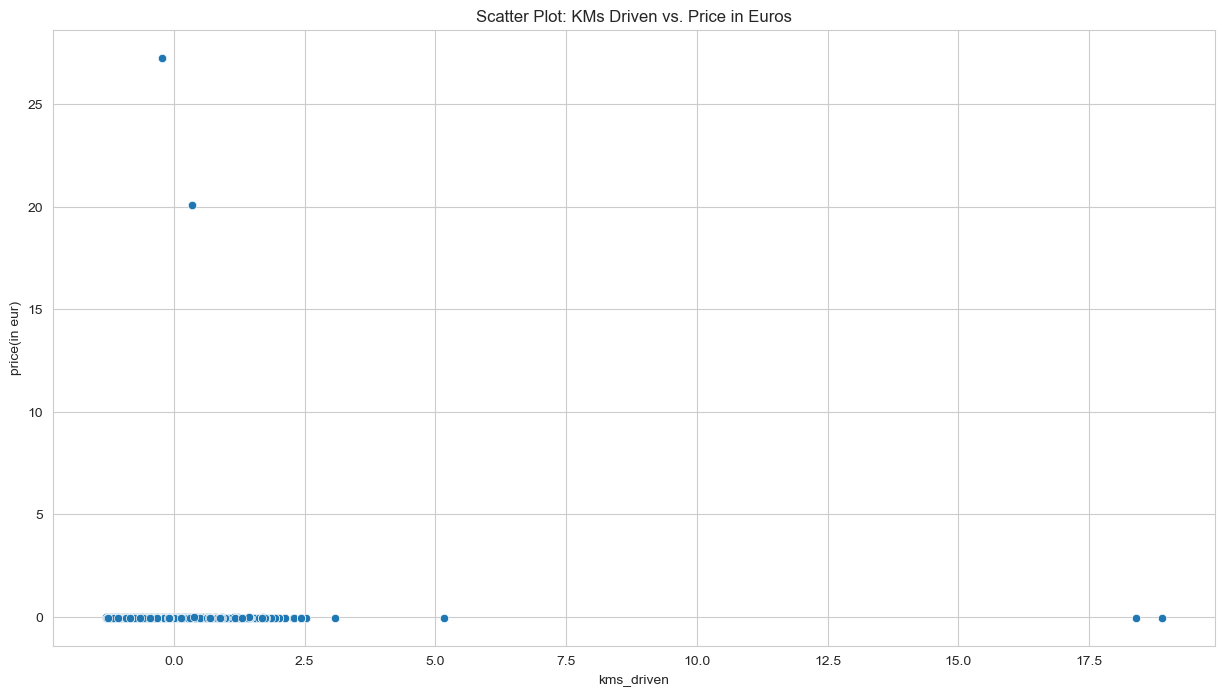

In [25]:
# Scatter plots for numerical variables against the price in euros
plt.figure(figsize=(15, 8))
sns.scatterplot(x='kms_driven', y='price(in eur)', data=df)
plt.title('Scatter Plot: KMs Driven vs. Price in Euros')
plt.show()

# Repeat for other numerical variables


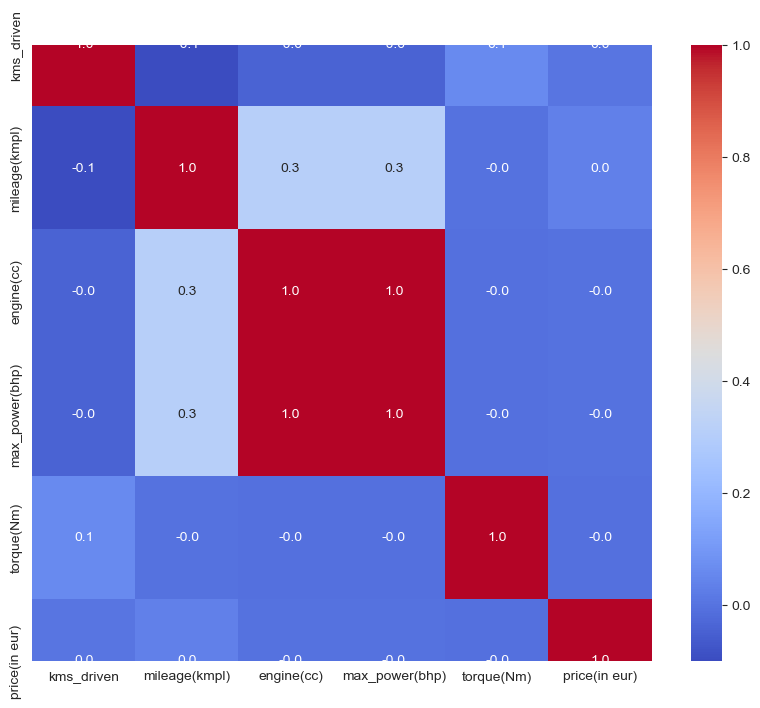

In [27]:
# 4. Correlation Matrix
correlation_matrix = df[numerical_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

In [28]:
correlation_matrix = df[numerical_variables].corr()
print(correlation_matrix)

                kms_driven  mileage(kmpl)  engine(cc)  max_power(bhp)  \
kms_driven        1.000000      -0.100313   -0.041489       -0.041489   
mileage(kmpl)    -0.100313       1.000000    0.309135        0.309135   
engine(cc)       -0.041489       0.309135    1.000000        1.000000   
max_power(bhp)   -0.041489       0.309135    1.000000        1.000000   
torque(Nm)        0.059302      -0.002318   -0.009421       -0.009421   
price(in eur)     0.003955       0.036199   -0.003192       -0.003192   

                torque(Nm)  price(in eur)  
kms_driven        0.059302       0.003955  
mileage(kmpl)    -0.002318       0.036199  
engine(cc)       -0.009421      -0.003192  
max_power(bhp)   -0.009421      -0.003192  
torque(Nm)        1.000000      -0.006455  
price(in eur)    -0.006455       1.000000  


# Train-test split

In [30]:
# Revert the standardization of numerical variables
df[numerical_columns] = scaler.inverse_transform(df[numerical_columns])

In [46]:
selected_features = [
    "mileage(kmpl)",
    "engine(cc)",
    "max_power(bhp)",
    "torque(Nm)",
    "price(in eur)",
    # may include the following variable based on further analysis
    # "kms_driven"
]
features = df[selected_features]

# target_variable = "price(in eur)"

In [47]:
# Compute the index values for slicing the dataset
total_size = len(features)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

# Slice the standardized features dataset into train-validation-test sets
train_data = features[:train_size]
val_data = features[train_size:train_size+val_size]
test_data = features[train_size+val_size:]

In [48]:
print(train_data.head())

   mileage(kmpl)    engine(cc)  max_power(bhp)    torque(Nm)  price(in eur)
0    4807.607262  6.539883e+14    6.539883e+14  3.215160e+07   2.682640e+11
1   10420.525228  2.180787e+14    2.180787e+14  9.518793e+08   3.783063e+10
2   12340.271936  4.354878e+14    4.354878e+14  1.815784e+07   9.994159e+10
3    9893.765461  2.953506e+14    2.953506e+14  1.332606e+09   5.706147e+10
4    8822.687267  3.924862e+14    3.924862e+14  1.712657e+09   1.009936e+11


# Modeling

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [49]:
X_train, y_train = train_data.drop('price(in eur)', axis=1), train_data['price(in eur)']
X_val, y_val = val_data.drop('price(in eur)', axis=1), val_data['price(in eur)']
X_test, y_test = test_data.drop('price(in eur)', axis=1), test_data['price(in eur)']

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [50]:
# Fit the model to the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [51]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [54]:
# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse_val}')

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on Test Set: {mse_test}')

# Calculate RMSE
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)

print(f'RMSE on Validation Set: {rmse_val:.2f} euros')
print(f'RMSE on Test Set: {rmse_test:.2f} euros')

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'MAPE on Validation Set: {mape_val:.2f}%')
print(f'MAPE on Test Set: {mape_test:.2f}%')

Mean Squared Error on Validation Set: 1.5906779805924194e+27
Mean Squared Error on Test Set: 1.1122865926267261e+27
RMSE on Validation Set: 39883304534509.41 euros
RMSE on Test Set: 33350960895103.55 euros
MAPE on Validation Set: 10693.32%
MAPE on Test Set: 35139.44%


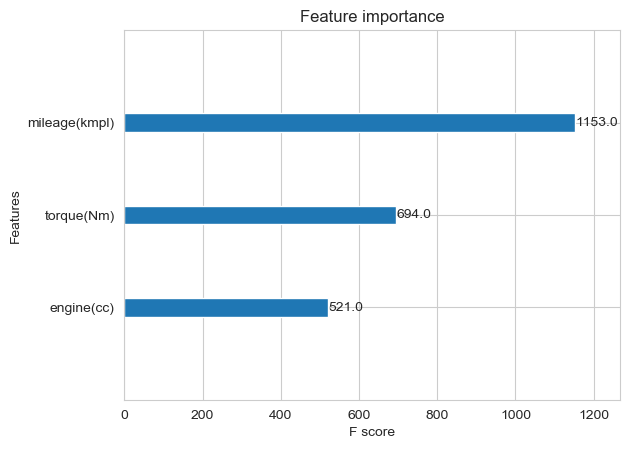

In [53]:

# Plot feature importance
xgb.plot_importance(model)
plt.show()


In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error (Best Model): {mse_best}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error (Best Model): 1.0427743619414208e+27
